# Project Replication code _harshini_tammareddy_ht442

## Dependencies

In [3]:
## Loading packages required 
import pandas as pd
import numpy as np

# For splits and CV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold # Cross validation 
from sklearn.model_selection import cross_validate # Cross validation 
from sklearn.model_selection import GridSearchCV # Cross validation + param. tuning.


# Machine learning methods 
from sklearn.preprocessing import LabelEncoder # for variable type conversion
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score, validation_curve, train_test_split
from sklearn.metrics import roc_curve, precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression as LR
from sklearn.naive_bayes import MultinomialNB


## for graphs
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import export_graphviz
import graphviz
from wordcloud import WordCloud
import missingno as miss

#misc
import warnings
warnings.filterwarnings("ignore")
import re
import string
import pickle

# nltk
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import seaborn as sns



## Data Investigation

In [4]:
# Read in the data
intitial_data = pd.read_csv("covidvaccine_Master data.csv") 

intitial_data.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,MyNewsNE,Assam,MyNewsNE a dedicated multi-lingual media house...,24-05-2020 10:18,64.0,11.0,110.0,False,18-08-2020 12:55,Australia to Manufacture Covid-19 Vaccine and ...,['CovidVaccine'],Twitter Web App,False
1,Shubham Gupta,NaN,I will tell about all experiences of my life f...,14-08-2020 16:42,1.0,17.0,0.0,False,18-08-2020 12:55,#CoronavirusVaccine #CoronaVaccine #CovidVacci...,"['CoronavirusVaccine', 'CoronaVaccine', 'Covid...",Twitter for Android,False
2,Journal of Infectiology,NaN,Journal of Infectiology (ISSN 2689-9981) is ac...,14-12-2017 07:07,143.0,566.0,8.0,False,18-08-2020 12:46,Deaths due to COVID-19 in Affected Countries\n...,NaN,Twitter Web App,False
3,Zane,NaN,Fresher than you.,18-09-2019 11:01,29.0,25.0,620.0,False,18-08-2020 12:45,@Team_Subhashree @subhashreesotwe @iamrajchoco...,NaN,Twitter for Android,False
4,Ann-Maree O’Connor,"Adelaide, South Australia",Retired university administrator. Melburnian b...,24-01-2013 14:53,83.0,497.0,10737.0,False,18-08-2020 12:45,@michellegrattan @ConversationEDU This is what...,NaN,Twitter Web App,False


In [5]:
## length of the data
intitial_data_length = len(intitial_data)
intitial_data_length #output

328619

In [6]:
## length of the data
len(intitial_data.columns)

13

In [7]:
#data types in the dataset
type_1 = intitial_data.dtypes
type_1


user_name            object
user_location        object
user_description     object
user_created         object
user_followers      float64
user_friends         object
user_favourites      object
user_verified        object
date                 object
text                 object
hashtags             object
source               object
is_retweet           object
dtype: object

In [8]:
##creating a output csv file for submitting memo 
type_1.to_csv("initial data types.csv", sep=',',index=False)

In [9]:
# Checking any Missing Values
intitial_data.isnull().any()

user_name           True
user_location       True
user_description    True
user_created        True
user_followers      True
user_friends        True
user_favourites     True
user_verified       True
date                True
text                True
hashtags            True
source              True
is_retweet          True
dtype: bool

In [10]:
 #checking how much invalid data exists
    # to determine if data is valid
intitial_data.isnull().sum()

user_name                6
user_location        41944
user_description     10919
user_created        131421
user_followers      131422
user_friends        131422
user_favourites     131422
user_verified       131422
date                131424
text                131422
hashtags            193038
source              133821
is_retweet          131430
dtype: int64

In [11]:

## Verifying each variable for percentage of missingness
total = intitial_data.isnull().sum().sort_values(ascending=False)
percent = (intitial_data.isnull().sum()/intitial_data.isnull().count()).sort_values(ascending=False) # percent of missingness
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])#table of missingness
missing_data.head(20)#output

,Total,Percent
hashtags,193038,0.587422
source,133821,0.407222
is_retweet,131430,0.399946
date,131424,0.399928
text,131422,0.399922
user_verified,131422,0.399922
user_favourites,131422,0.399922
user_friends,131422,0.399922
user_followers,131422,0.399922
user_created,131421,0.399919


In [13]:
##creating a output csv file of missingness for memo
missing_data.to_csv("missing.csv", sep=',',index=False)

In [14]:
## drop unnecessary variables from the dataframe
df1 = intitial_data.drop(['is_retweet','user_verified'], axis=1)

#### Creating feature variable

In [15]:
 #combining text and hashtag variable
df1['tweet'] = df1['text'].fillna('') + intitial_data['hashtags'].fillna('')

df1['tweet'].replace(r'^\s*$', np.nan, regex=True, inplace=True)

df1.head()#output

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,date,text,hashtags,source,tweet
0,MyNewsNE,Assam,MyNewsNE a dedicated multi-lingual media house...,24-05-2020 10:18,64.0,11.0,110.0,18-08-2020 12:55,Australia to Manufacture Covid-19 Vaccine and ...,['CovidVaccine'],Twitter Web App,Australia to Manufacture Covid-19 Vaccine and ...
1,Shubham Gupta,NaN,I will tell about all experiences of my life f...,14-08-2020 16:42,1.0,17.0,0.0,18-08-2020 12:55,#CoronavirusVaccine #CoronaVaccine #CovidVacci...,"['CoronavirusVaccine', 'CoronaVaccine', 'Covid...",Twitter for Android,#CoronavirusVaccine #CoronaVaccine #CovidVacci...
2,Journal of Infectiology,NaN,Journal of Infectiology (ISSN 2689-9981) is ac...,14-12-2017 07:07,143.0,566.0,8.0,18-08-2020 12:46,Deaths due to COVID-19 in Affected Countries\n...,NaN,Twitter Web App,Deaths due to COVID-19 in Affected Countries\n...
3,Zane,NaN,Fresher than you.,18-09-2019 11:01,29.0,25.0,620.0,18-08-2020 12:45,@Team_Subhashree @subhashreesotwe @iamrajchoco...,NaN,Twitter for Android,@Team_Subhashree @subhashreesotwe @iamrajchoco...
4,Ann-Maree O’Connor,"Adelaide, South Australia",Retired university administrator. Melburnian b...,24-01-2013 14:53,83.0,497.0,10737.0,18-08-2020 12:45,@michellegrattan @ConversationEDU This is what...,NaN,Twitter Web App,@michellegrattan @ConversationEDU This is what...


In [16]:
df2 = df1.drop(['text','hashtags'], axis=1)#dropping text and hashtag variable from the dataframe
df2.head()#output

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,date,source,tweet
0,MyNewsNE,Assam,MyNewsNE a dedicated multi-lingual media house...,24-05-2020 10:18,64.0,11.0,110.0,18-08-2020 12:55,Twitter Web App,Australia to Manufacture Covid-19 Vaccine and ...
1,Shubham Gupta,NaN,I will tell about all experiences of my life f...,14-08-2020 16:42,1.0,17.0,0.0,18-08-2020 12:55,Twitter for Android,#CoronavirusVaccine #CoronaVaccine #CovidVacci...
2,Journal of Infectiology,NaN,Journal of Infectiology (ISSN 2689-9981) is ac...,14-12-2017 07:07,143.0,566.0,8.0,18-08-2020 12:46,Twitter Web App,Deaths due to COVID-19 in Affected Countries\n...
3,Zane,NaN,Fresher than you.,18-09-2019 11:01,29.0,25.0,620.0,18-08-2020 12:45,Twitter for Android,@Team_Subhashree @subhashreesotwe @iamrajchoco...
4,Ann-Maree O’Connor,"Adelaide, South Australia",Retired university administrator. Melburnian b...,24-01-2013 14:53,83.0,497.0,10737.0,18-08-2020 12:45,Twitter Web App,@michellegrattan @ConversationEDU This is what...


In [17]:
df2.shape#final shape of the dataframe

(328619, 10)

In [18]:
##checking for missingness 
total2 = df2.isnull().sum().sort_values(ascending=False)
percent2 = (df2.isnull().sum()/df2.isnull().count()).sort_values(ascending=False)
missing_data2 = pd.concat([total2, percent2], axis=1, keys=['Total', 'Percent'])
missing_data2.head(20)##output

,Total,Percent
source,133821,0.407222
date,131424,0.399928
tweet,131422,0.399922
user_favourites,131422,0.399922
user_friends,131422,0.399922
user_followers,131422,0.399922
user_created,131421,0.399919
user_location,41944,0.127637
user_description,10919,0.033227
user_name,6,0.000018


In [19]:
## dropping null values from feature variable
df3 = df2.dropna(subset=['tweet'])

In [20]:
#cross verifying for null values in feature variable
df3.isnull().any()

user_name            True
user_location        True
user_description     True
user_created        False
user_followers      False
user_friends        False
user_favourites     False
date                 True
source               True
tweet               False
dtype: bool

In [21]:
#checking the shape
df3.shape

(197197, 10)

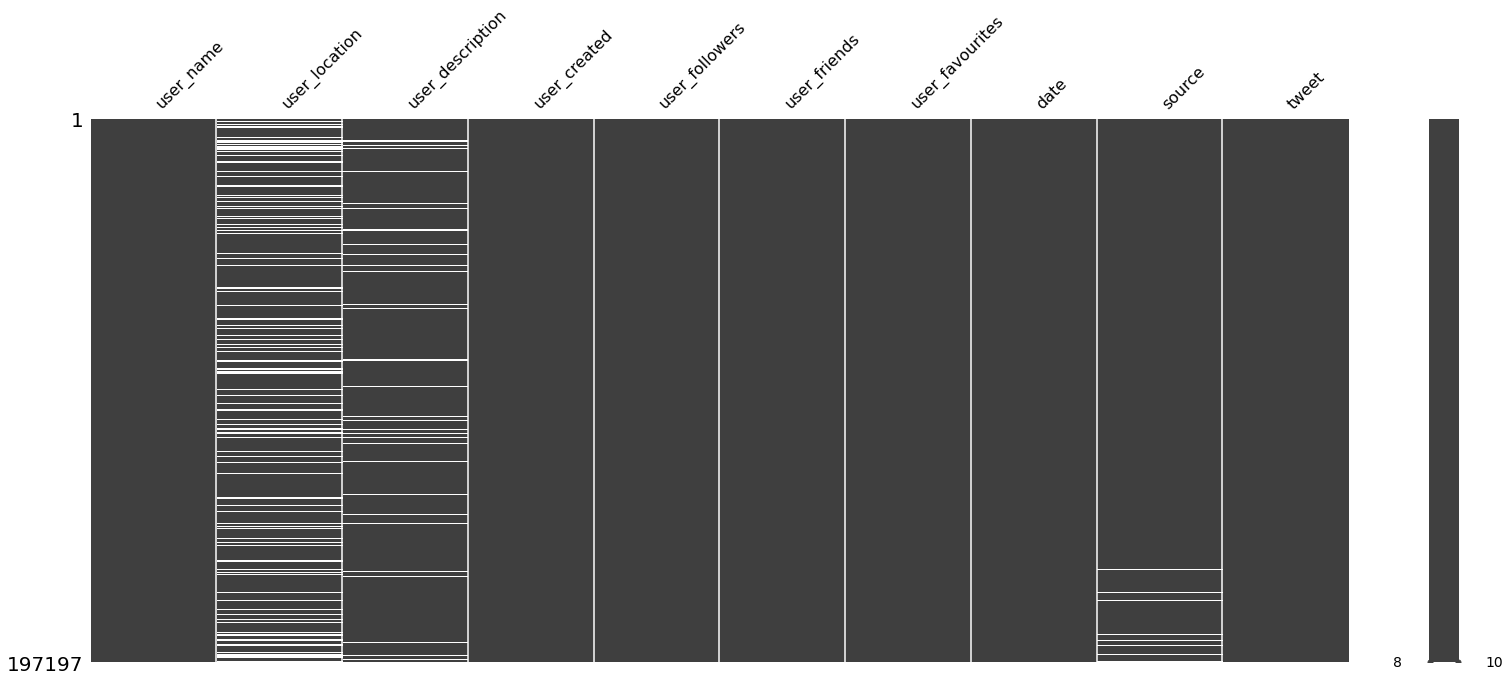

In [22]:
#Checked to see if that dataset was complete
miss.matrix(df3)

In [23]:
df4 = df3.dropna()
df4.shape

(150513, 10)

In [25]:
##creating a output csv file
df4.to_csv("processed data.csv", sep=',',index=False)

In [26]:
df4.dtypes

user_name            object
user_location        object
user_description     object
user_created         object
user_followers      float64
user_friends         object
user_favourites      object
date                 object
source               object
tweet                object
dtype: object

In [27]:
from sklearn.preprocessing import LabelEncoder
model = LabelEncoder()
df4['user_name'] = model.fit_transform(df4['user_name'].astype('str'))
df4['user_location'] = model.fit_transform(df4['user_location'].astype('str'))
df4['user_description'] = model.fit_transform(df4['user_description'].astype('str'))
df4['user_created'] = model.fit_transform(df4['user_created'].astype('str'))

df4['source'] = model.fit_transform(df4['source'].astype('str'))
df4['tweet'] = model.fit_transform(df4['tweet'].astype('str'))

In [28]:
df4['user_friends'] = df4['user_friends'].astype(str).astype(float)
df4['user_favourites'] = df4['user_favourites'].astype(str).astype(float)

df4.dtypes

user_name             int32
user_location         int32
user_description      int32
user_created          int32
user_followers      float64
user_friends        float64
user_favourites     float64
date                 object
source                int32
tweet                 int32
dtype: object

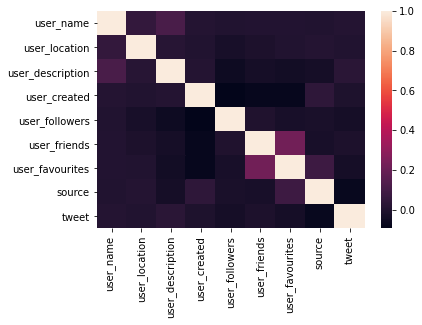

In [29]:
# Correlation between all the Parameters  
# if it is positive, the two variables tend to be high or low together
# If it is negative, the two variables tend to be opposite of each other
corr = df4.corr()
# Correlation Plot
map = sns.heatmap(corr)

In [30]:
## Visualising Correlation Matrix with actual Correlation Values
cmap=sns.diverging_palette(5, 250, as_cmap=True)
corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '8pt'})\
    .set_precision(3) 

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,source,tweet
user_name,1.000,0.053,0.117,0.011,0.000,0.006,0.005,0.002,0.011
user_location,0.053,1.000,0.020,0.004,-0.025,-0.010,0.003,0.011,0.004
user_description,0.117,0.020,1.000,0.010,-0.053,-0.031,-0.041,-0.032,0.028
user_created,0.011,0.004,0.010,1.000,-0.094,-0.075,-0.075,0.040,-0.006
user_followers,0.000,-0.025,-0.053,-0.094,1.000,-0.002,-0.025,-0.017,-0.034
user_friends,0.006,-0.010,-0.031,-0.075,-0.002,1.000,0.225,-0.023,-0.009
user_favourites,0.005,0.003,-0.041,-0.075,-0.025,0.225,1.000,0.083,-0.034
source,0.002,0.011,-0.032,0.040,-0.017,-0.023,0.083,1.000,-0.069
tweet,0.011,0.004,0.028,-0.006,-0.034,-0.009,-0.034,-0.069,1.000


In [31]:
##creating a output csv file for memo
corr.to_csv("C:/Users/VIOLIN/Desktop/DS 2 Project/correlation.csv", sep=',',index=False)

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/VIOLIN/Desktop/DS 2 Project/correlation.csv'

In [ ]:
## statistical summaries of all the variables
stat = df4.describe() 
stat #output

In [ ]:
##creating a output csv file for memo
stat.to_csv("statistics.csv", sep=',',index=False)

In [ ]:
## histograms of variables 
num_bins = 10

df4.hist(bins = num_bins, figsize=(20,15))
plt.savefig("HistogramPlots.png") ## for memo
plt.show() 

#### End of memo 1 work. 

## Data preprocessing

In [32]:
##loading output file
df = pd.read_csv("processed data.csv")

In [33]:
#reading dataframe
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,date,source,tweet
0,MyNewsNE,Assam,MyNewsNE a dedicated multi-lingual media house...,24-05-2020 10:18,64.0,11.0,110.0,18-08-2020 12:55,Twitter Web App,Australia to Manufacture Covid-19 Vaccine and ...
1,Ann-Maree O’Connor,"Adelaide, South Australia",Retired university administrator. Melburnian b...,24-01-2013 14:53,83.0,497.0,10737.0,18-08-2020 12:45,Twitter Web App,@michellegrattan @ConversationEDU This is what...
2,Rajesh Tadepalli,"Hyderabad, India",Growth Initiatives @tech_mahindra | AIMer | Br...,07-05-2013 03:57,918.0,2561.0,31837.0,18-08-2020 12:34,Twitter for Android,@PrivilRodrigues @yatish57 @deepkaranahuja @sh...
3,AKisASocialisolationist wash yer damn hands,The Great Pacific Northwest,"Iconoclast, cat person, soccer fan, textile & ...",07-02-2015 07:24,2321.0,3236.0,264351.0,18-08-2020 12:30,Twitter for iPhone,"@MSNBC Well, let’s qualify that: would anyone ..."
4,Dr. Joseph Santoro,"Washington, DC 20009","Neuro PhD, #Innovator, #Technologist, #Startup...",17-01-2009 21:10,19091.0,20986.0,128119.0,18-08-2020 12:15,Hootsuite Inc.,"Most countries, without the ability to make #V..."


In [34]:
#checking data types
df.dtypes

user_name            object
user_location        object
user_description     object
user_created         object
user_followers      float64
user_friends        float64
user_favourites     float64
date                 object
source               object
tweet                object
dtype: object

In [35]:
## converting date variable into dat time format
df['date'] = df['date'].astype('datetime64[ns]')

In [36]:
##removing time stamps
df['date'] = pd.to_datetime(df['date'], errors='coerce').dt.floor('d')
df.head()#output

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,date,source,tweet
0,MyNewsNE,Assam,MyNewsNE a dedicated multi-lingual media house...,24-05-2020 10:18,64.0,11.0,110.0,2020-08-18,Twitter Web App,Australia to Manufacture Covid-19 Vaccine and ...
1,Ann-Maree O’Connor,"Adelaide, South Australia",Retired university administrator. Melburnian b...,24-01-2013 14:53,83.0,497.0,10737.0,2020-08-18,Twitter Web App,@michellegrattan @ConversationEDU This is what...
2,Rajesh Tadepalli,"Hyderabad, India",Growth Initiatives @tech_mahindra | AIMer | Br...,07-05-2013 03:57,918.0,2561.0,31837.0,2020-08-18,Twitter for Android,@PrivilRodrigues @yatish57 @deepkaranahuja @sh...
3,AKisASocialisolationist wash yer damn hands,The Great Pacific Northwest,"Iconoclast, cat person, soccer fan, textile & ...",07-02-2015 07:24,2321.0,3236.0,264351.0,2020-08-18,Twitter for iPhone,"@MSNBC Well, let’s qualify that: would anyone ..."
4,Dr. Joseph Santoro,"Washington, DC 20009","Neuro PhD, #Innovator, #Technologist, #Startup...",17-01-2009 21:10,19091.0,20986.0,128119.0,2020-08-18,Hootsuite Inc.,"Most countries, without the ability to make #V..."


In [37]:
## jan 4th -- mass vaccination roll out 
## https://www.ajmc.com/view/a-timeline-of-covid-19-vaccine-developments-in-2021
##https://apnews.com/article/joe-biden-coronavirus-pandemic-coronavirus-vaccine-6b624ae3a0ebdda0d91e867d59c8ca46? -- feb 25th
## creating a new dataframe with tweets in required dates
new = df[(df['date'] > '2021-01-05') & (df['date'] < '2021-03-31')]

new.head() 

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,date,source,tweet
29092,KPIX 5,San Francisco Bay Area,"News, Sports, Weather, Traffic & the Best of t...",2008-10-08 22:43:25,102655.0,1908.0,1661.0,2021-01-15,Twitter Web App,COVID-19 NEWS ROUNDUP\nConfusion over the #Cov...
29093,The Proud Patriot,Everywhere,#NRA #2A 🇺🇸 #BlueLivesMatter https://t.co/P8sb...,2013-04-03 10:23:19,10266.0,8889.0,76229.0,2021-01-15,Twitter for iPhone,23 die in Norway after receiving Pfizer COVID-...
29094,Doron Dorfman,"Syracuse, NY",Assoc. Professor @SUCollegeofLaw. Disability L...,2018-06-12 02:53:32,1707.0,1291.0,22622.0,2021-01-15,Twitter for iPhone,So this just happened 🎉\nThank you to ⁦@NYGov⁩...
29095,Daxesh Mavani,"Surat, India",Bjym state commite member Gujrat | sec: vatsal...,2012-06-18 14:22:13,4172.0,334.0,10569.0,2021-01-15,Twitter for Android,It is recommended that everyone should complet...
29096,UR Medicine,"Rochester, New York",We're one of the nation's top academic medical...,2008-11-11 17:51:49,7706.0,861.0,4560.0,2021-01-15,Twitter for iPhone,We started vaccinating our patients today. 93...


In [38]:
#output shape
new.shape 

(112013, 10)

In [39]:
## let us filter and select tweets only based out of United States
new.user_location.value_counts()

India                          2119
United States                  1894
London, England                1861
London                         1626
United Kingdom                 1189
                               ... 
Somewhere over the rainbow.       1
section red                       1
Atlanta and Washington, DC        1
Northeast United States           1
Maine-NYC-LDN-Bbay                1
Name: user_location, Length: 20530, dtype: int64

In [40]:
##let us check tweets from each location with more than 200 tweets !

top_jan = new['user_location'][pd.DatetimeIndex(new['date']).month == 1].value_counts()
top_feb = new['user_location'][pd.DatetimeIndex(new['date']).month == 2].value_counts()
top_march = new['user_location'][pd.DatetimeIndex(new['date']).month == 3].value_counts()
top_all_the_time = (top_march + top_feb + top_jan).sort_values(ascending = False)
top_all_the_time.head(60)

India                           2119.0
United States                   1894.0
London, England                 1861.0
London                          1626.0
United Kingdom                  1189.0
Washington, DC                  1119.0
New York, NY                     917.0
UK                               840.0
England, United Kingdom          803.0
Los Angeles, CA                  756.0
Boston, MA                       753.0
Chicago, IL                      752.0
New Delhi, India                 673.0
USA                              643.0
Canada                           611.0
Houston, TX                      554.0
London, UK                       553.0
Atlanta, GA                      551.0
Philadelphia, PA                 518.0
England                          513.0
Toronto, Ontario                 490.0
Ireland                          474.0
Mumbai, India                    472.0
New York                         469.0
New York, USA                    460.0
California, USA          

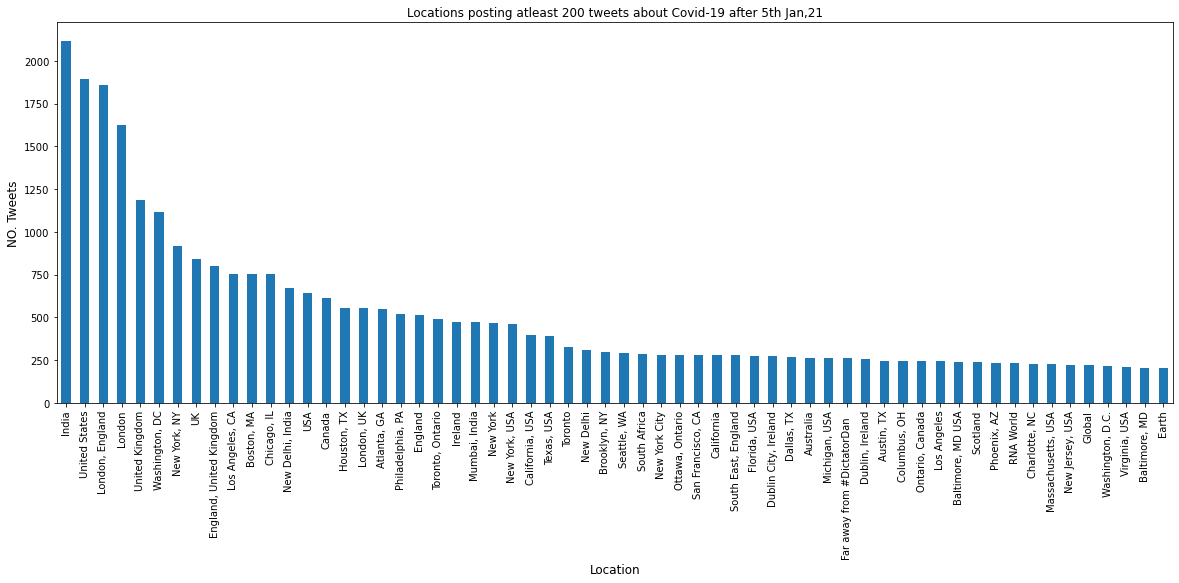

In [41]:
## Plotting the output
fig, ax = plt.subplots(figsize = (20,7))
plt.xlabel("Location", fontsize = 12)
plt.ylabel("NO. Tweets", fontsize = 12)
top_all_the_time[0:60].plot(kind='bar', title = "Locations posting atleast 200 tweets about Covid-19 after 5th Jan,21",)
plt.savefig("initial user location.png")
plt.show()

In [42]:
##filtering dataframe based on locations
country = ['United States','Washington, DC', 'New York, NY', 'Los Angeles, CA','Chicago, IL','USA','Houston, TX','Atlanta, GA','Philadelphia, PA','New York','New York, USA','California, USA','Texas, USA','Brooklyn, NY','Seattle, WA','New York City','San Francisco, CA','California ','Florida, USA ','Dallas, TX ','Michigan, USA','Austin, TX','Los Angeles ','Baltimore, MD USA','Phoenix, AZ','Charlotte, NC','Massachusetts, USA','New Jersey, USA','Washington, D.C.','Virginia, USA','Baltimore, MD']
new2 = new[new.user_location.isin(country)]
new2.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,date,source,tweet
29103,My Budget Adviser 🇺🇲,United States,Veteran |Husband |Dad |Author |Wells Fargo VP ...,2017-08-15 15:36:33,88.0,283.0,2834.0,2021-01-15,Twitter for Android,#BreakingNews #BREAKING \n\nThe #IRS delays st...
29123,Sema Sgaier,"Washington, DC","Working through pandemics: #COVID19, #HIV, #TB...",2011-11-23 07:24:36,872.0,560.0,1832.0,2021-01-15,Twitter Web App,New findings fr @SurgoVentures survey of U.S....
29126,Jessie Vargas Loera,"Texas, USA",A lefty in the right state of mind,2011-04-12 18:49:33,188.0,618.0,12715.0,2021-01-15,Twitter for iPhone,Help spread the word! #COVID19 #CovidVaccine #...
29134,The IZ Partnership,"Houston, TX",We are unapologetic advocates of immunization....,2008-11-16 21:16:23,2148.0,2212.0,569.0,2021-01-15,Twitter Web App,TIP president and CEO Allison Winnike on #Covi...
29142,Dr. Kirsten Brown,"Washington, DC",Associate Professor & Vice Chair for Education...,2010-03-12 14:03:31,1691.0,1203.0,13349.0,2021-01-15,Twitter for Android,"#HappyFriday from my 76 year-old mother, Kay B..."


In [43]:
new2.shape

(12914, 10)

In [44]:
##converting the output into csv to create target(label) variable with human interference
new2.to_csv("master_new.csv", sep=',',index=False)

In [45]:
##Loading the data with target variable
dat = pd.read_csv("labelled_data.csv")
##output
dat.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,date,source,tweet,Label
0,My Budget Adviser 🇺🇲,United States,Veteran |Husband |Dad |Author |Wells Fargo VP ...,8/15/2017 15:36,88,283,2834,1/15/2021,Twitter for Android,#BreakingNews #BREAKING \n\nThe #IRS delays st...,0.0
1,Sema Sgaier,"Washington, DC","Working through pandemics: #COVID19, #HIV, #TB...",11/23/2011 7:24,872,560,1832,1/15/2021,Twitter Web App,New findings fr @SurgoVentures survey of U.S....,0.0
2,Jessie Vargas Loera,"Texas, USA",A lefty in the right state of mind,4/12/2011 18:49,188,618,12715,1/15/2021,Twitter for iPhone,Help spread the word! #COVID19 #CovidVaccine #...,0.0
3,The IZ Partnership,"Houston, TX",We are unapologetic advocates of immunization....,11/16/2008 21:16,2148,2212,569,1/15/2021,Twitter Web App,TIP president and CEO Allison Winnike on #Covi...,0.0
4,Dr. Kirsten Brown,"Washington, DC",Associate Professor & Vice Chair for Education...,3/12/2010 14:03,1691,1203,13349,1/15/2021,Twitter for Android,"#HappyFriday from my 76 year-old mother, Kay B...",0.0


In [46]:
#shape
dat.shape

(12914, 11)

In [47]:
# Checking any Missing Values
dat.isnull().any()

user_name           False
user_location       False
user_description    False
user_created        False
user_followers      False
user_friends        False
user_favourites     False
date                False
source              False
tweet               False
Label                True
dtype: bool

In [48]:
##dropping all the missing values
data = dat.dropna()
data.shape

(3999, 11)

In [49]:
## Let us reveiw the data 
# listing Datatypes  
data.dtypes

user_name            object
user_location        object
user_description     object
user_created         object
user_followers        int64
user_friends          int64
user_favourites       int64
date                 object
source               object
tweet                object
Label               float64
dtype: object

In [50]:
# check the number of positive vs. negative tagged sentences
efficiency_tweets = data['Label'][data.Label == 1 ]
other_tweets = data['Label'][data.Label == 0 ]

print('Total length of the data is:         {}'.format(data.shape[0]))
print('No. of efficiency related tweets is:  {}'.format(len(efficiency_tweets)))
print('No. of other tweets is: {}'.format(len(other_tweets)))

Total length of the data is:         3999
No. of efficiency related tweets is:  149
No. of other tweets is: 3850


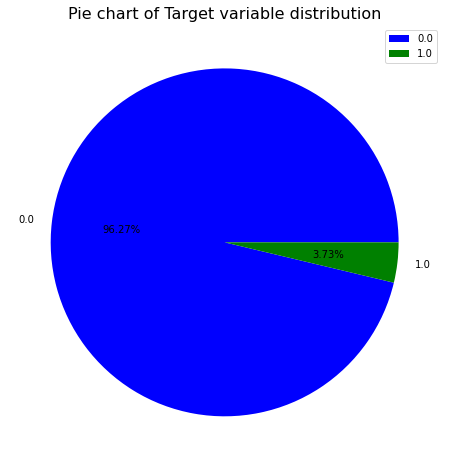

In [51]:
## Plotting target variable
fig = plt.figure(figsize=(8,8))
targets = data.groupby('Label').size()
targets.plot(kind='pie', subplots=True, figsize=(10, 8), autopct = "%.2f%%", colors=['Blue','green'])
plt.title("Pie chart of Target variable distribution",fontsize=16)
plt.ylabel("")
plt.legend()
plt.savefig("Pichart_target.png") #output png file
plt.show() #output 
 

### Length of tweet content

In [52]:
data['length'] = data.tweet.str.split().apply(len)

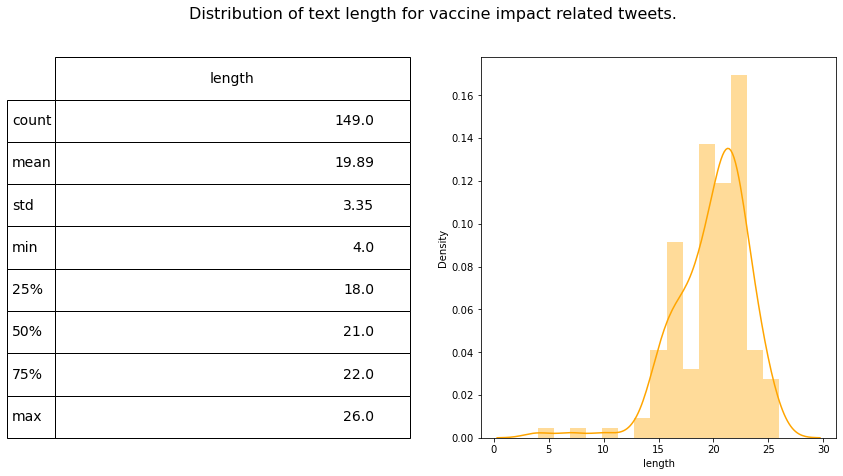

In [53]:
fig = plt.figure(figsize=(14,7))

ax1 = fig.add_subplot(122)
sns.distplot(data[data['Label']==1]['length'], ax=ax1,color='Orange')
describe = data.length[data.Label==1].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for vaccine impact related tweets.', fontsize=16)
plt.savefig("text length_impact.png")
plt.show()

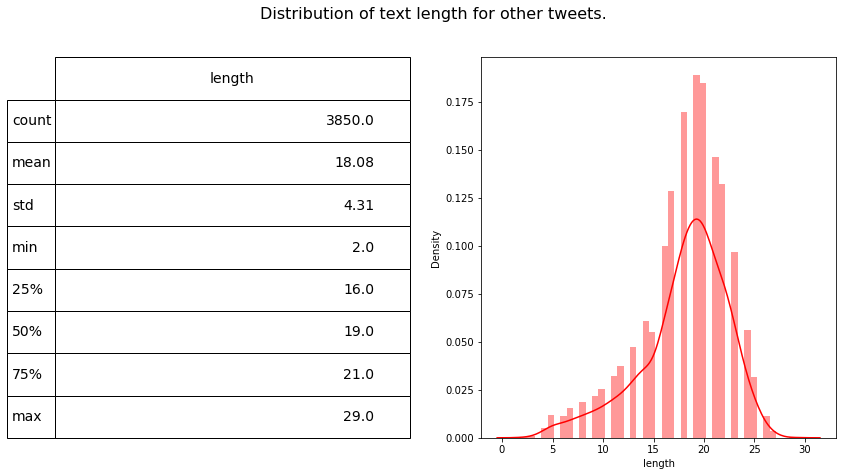

In [54]:
fig = plt.figure(figsize=(14,7))

ax1 = fig.add_subplot(122)
sns.distplot(data[data['Label']==0]['length'], ax=ax1,color='red')
describe = data.length[data.Label==0].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for other tweets.', fontsize=16)
plt.savefig("text lenght no impacts.png")
plt.show()

#### Checking user variable

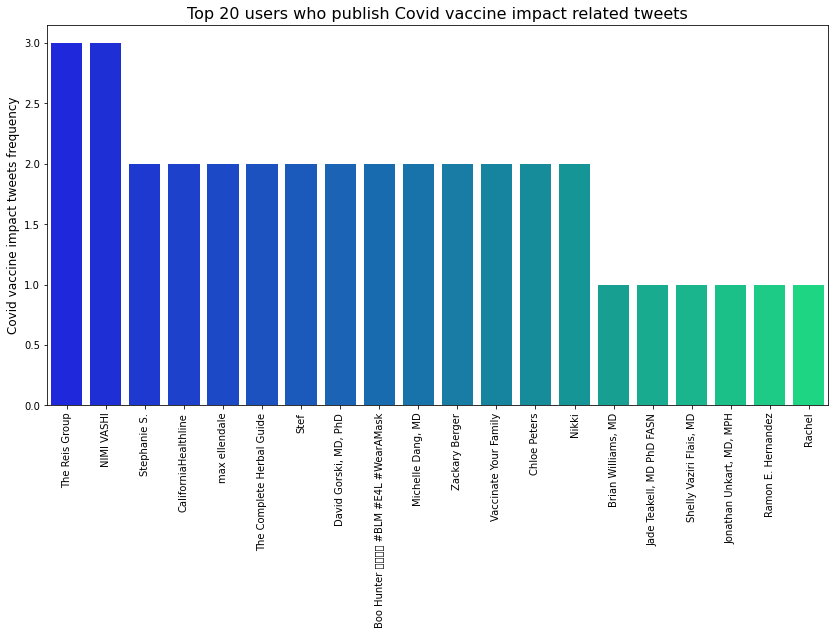

In [55]:
## pllotting User variable top 20 users and frequency of tweets
plt.figure(figsize=(14,7))
common_keyword=sns.barplot(x=data[data['Label']==1]['user_name'].value_counts()[:20].index, \
                           y=data[data['Label']==1]['user_name'].value_counts()[:20],palette='winter')
common_keyword.set_xticklabels(common_keyword.get_xticklabels(),rotation=90)
common_keyword.set_ylabel('Covid vaccine impact tweets frequency',fontsize=12)
plt.title('Top 20 users who publish Covid vaccine impact related tweets',fontsize=16)
plt.savefig("text lenght-impact.png")
plt.show()

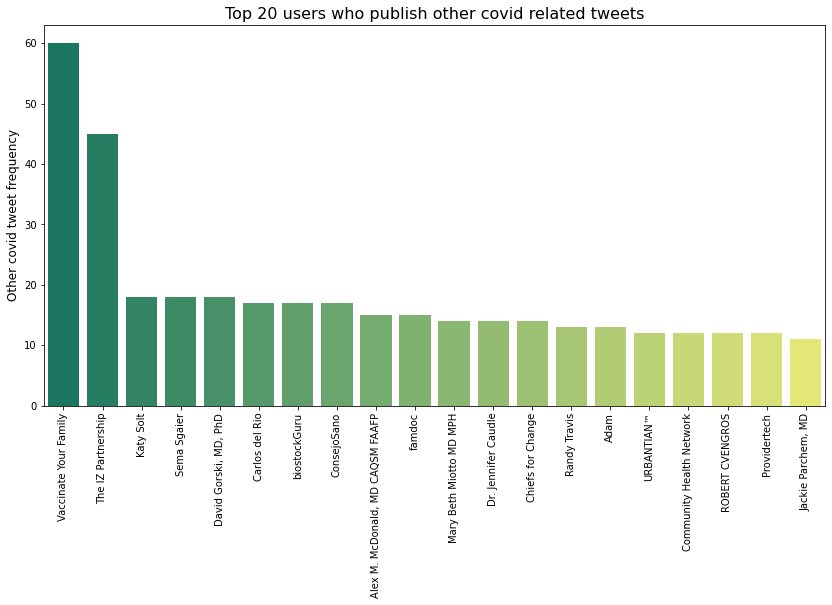

In [56]:
##plotting user variable for other covid tweets
plt.figure(figsize=(14,7))
common_keyword=sns.barplot(x=data[data['Label']==0]['user_name'].value_counts()[:20].index, \
                           y=data[data['Label']==0]['user_name'].value_counts()[:20],palette='summer')
common_keyword.set_xticklabels(common_keyword.get_xticklabels(),rotation=90)
common_keyword.set_ylabel('Other covid tweet frequency',fontsize=12)
plt.title('Top 20 users who publish other covid related tweets',fontsize=16)
plt.savefig("text lenght-no impact.png")
plt.show()

In [57]:
##top user in both the tweet sets
data[data['user_name']=='Vaccinate Your Family'].head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,date,source,tweet,Label,length
124,Vaccinate Your Family,United States,Twitter account of Vaccinate Your Family (form...,7/28/2010 14:38,8500,2208,2439,1/15/2021,Sprout Social,What's it like to get the #COVIDvaccine?\n\nIn...,0.0,20
173,Vaccinate Your Family,United States,Twitter account of Vaccinate Your Family (form...,7/28/2010 14:38,8500,2208,2439,1/15/2021,Sprout Social,“Pharmacies Say They Could Do More to Distribu...,0.0,17
325,Vaccinate Your Family,United States,Twitter account of Vaccinate Your Family (form...,7/28/2010 14:38,8500,2208,2439,1/14/2021,Sprout Social,“Should the Government Pay People to Get Vacci...,0.0,18
327,Vaccinate Your Family,United States,Twitter account of Vaccinate Your Family (form...,7/28/2010 14:38,8500,2208,2439,1/14/2021,Sprout Social,“An Open Fund for Projects Debunking Vaccine M...,0.0,15
329,Vaccinate Your Family,United States,Twitter account of Vaccinate Your Family (form...,7/28/2010 14:38,8500,2208,2439,1/14/2021,Sprout Social,“Pregnant Physicians Say Benefits of COVID-19 ...,1.0,16


###### No bots in top user

In [58]:
# get a word count per of text
def word_count(words):
    return len(words.split())

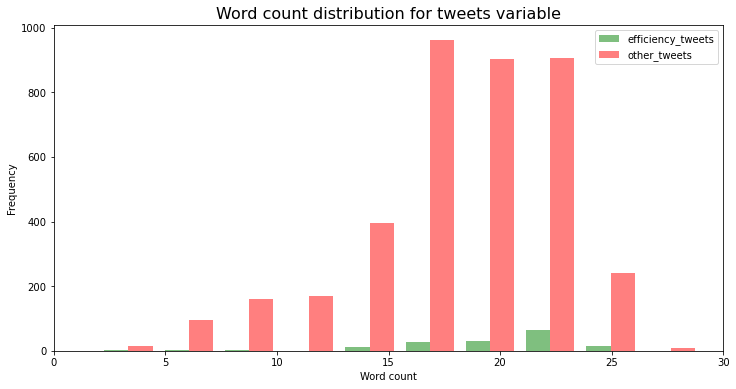

In [59]:
# plot word count distribution for both positive and negative 

data['word count'] = data['tweet'].apply(word_count)
p = data['word count'][data.Label == 1]
n = data['word count'][data.Label == 0]
plt.figure(figsize=(12,6))
plt.xlim(0,30)
plt.xlabel('Word count')
plt.ylabel('Frequency')
g = plt.hist([p, n], color=['g','r'], alpha=0.5, label=['efficiency_tweets','other_tweets'])
plt.title('Word count distribution for tweets variable',fontsize=16)
plt.savefig("Word count distribution for tweets variable.png")
plt.legend(loc='upper right')

In [61]:
data.dtypes

user_name            object
user_location        object
user_description     object
user_created         object
user_followers        int64
user_friends          int64
user_favourites       int64
date                 object
source               object
tweet                object
Label               float64
length                int64
word count            int64
dtype: object

In [103]:

from collections import Counter
all_words = []
for line in list(data['tweet']):
    words = line.split()
    for word in words:
      if(len(word)>2):
        all_words.append(word.lower())
    
    
Counter(all_words).most_common(20)

[('the', 2474),
 ('#covidvaccine', 1803),
 ('and', 1044),
 ('for', 856),
 ('vaccine', 587),
 ('get', 501),
 ('this', 501),
 ('you', 481),
 ("'covidvaccine']", 458),
 ('are', 432),
 ('that', 356),
 ('have', 338),
 ('#covid19', 338),
 ('with', 336),
 ('&amp;', 294),
 ('dose', 275),
 ('got', 262),
 ('first', 242),
 ('our', 240),
 ('covid', 236)]

In [104]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
stopword = set(stopwords.words('english'))
print(stopword)

{'aren', 'won', "mightn't", 're', 'only', 'any', 'further', 'his', 'doing', 'there', 'yourselves', 'i', 'not', 'mustn', 'during', 'because', "you've", 'to', 'have', 'an', 'be', 'each', 'few', 'needn', 'was', "mustn't", "hasn't", 'out', "you'll", "you'd", 'where', "couldn't", 'nor', "shan't", 'her', 'while', 'he', 'ourselves', 't', 'same', 'now', 'through', 'over', "don't", 'has', 'too', 'until', 'this', 'itself', 'more', 'down', 'off', 'from', 'whom', 'as', 'no', 'd', 'doesn', 'than', 'by', "didn't", 'mightn', 'can', "doesn't", 'on', "it's", 'who', 'but', "weren't", 'did', 'should', "shouldn't", 'them', 'just', "aren't", 'they', 'up', 'such', 'between', 'him', 'here', 'my', 'couldn', 'other', 'some', 'very', "wouldn't", 'those', 'didn', 'ours', 'y', 've', 'theirs', "wasn't", "won't", 'hasn', 'yourself', "she's", 'll', "that'll", 'below', 'our', 'been', 'you', 'why', 'weren', 'am', 'in', 'the', 'or', 'that', 'with', 'their', 'is', 'a', 'about', 'o', 'being', 'of', 'hadn', 'both', 'she',

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\VIOLIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\VIOLIN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\VIOLIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [105]:
urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
userPattern = '@[^\s]+'
def process_tweets(tweet):
  # Lower Casing
    tweet = tweet.lower()
    tweet=tweet[1:]
    # Removing all URls 
    tweet = re.sub(urlPattern,'',tweet)
    # Removing all @username.
    tweet = re.sub(userPattern,'', tweet) 
    #Remove punctuations
    tweet = tweet.translate(str.maketrans("","",string.punctuation))
    #tokenizing words
    tokens = word_tokenize(tweet)
    #Removing Stop Words
    final_tokens = [w for w in tokens if w not in stopword]
    #reducing a word to its word stem 
    wordLemm = WordNetLemmatizer()
    finalwords=[]
    for w in final_tokens:
      if len(w)>1:
        word = wordLemm.lemmatize(w)
        finalwords.append(word)
    return ' '.join(finalwords)

In [106]:
data['processed_tweets'] = data['tweet'].apply(lambda x: process_tweets(x))
print('Text Preprocessing complete.')

Text Preprocessing complete.


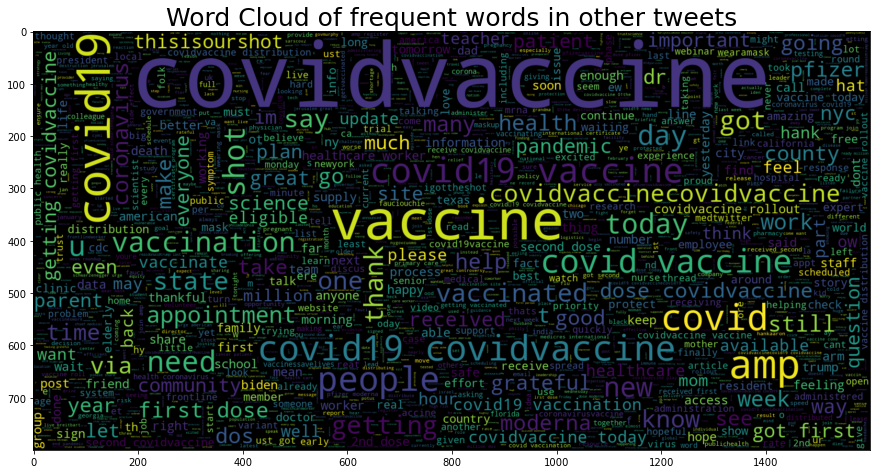

In [108]:
## Other tweets word cloud
plt.figure(figsize = (15,15)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.Label == 0].processed_tweets))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word Cloud of frequent words in other tweets',fontsize=25)
plt.savefig("Word cloud 0.png")

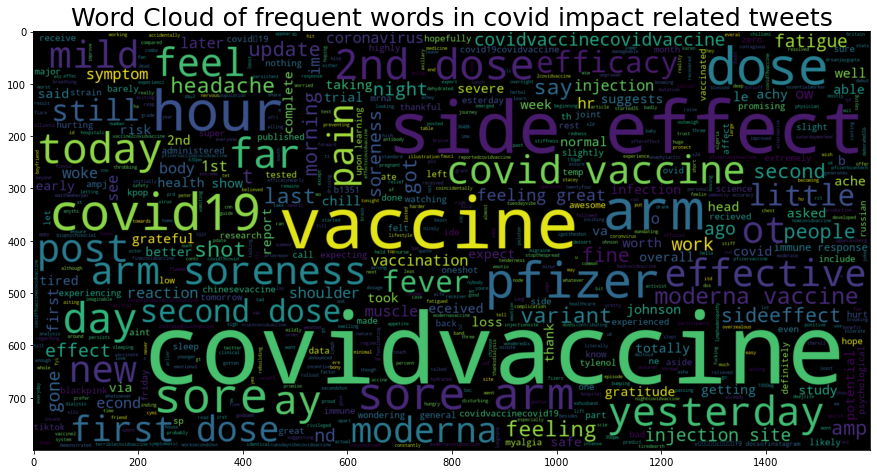

In [111]:
## Vaccine impact tweets word cloud
plt.figure(figsize = (15,15)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.Label == 1].processed_tweets))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word Cloud of frequent words in covid impact related tweets',fontsize=25)
plt.savefig("Word cloud 1.png")

## Modelling 

In [109]:
#  creating feature array & target array
X = data['tweet']
y = data['Label']

In [110]:
# review of target array
data.groupby(by='Label').agg('count')

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,date,source,tweet,length,word count,processed_tweets
Label,,,,,,,,,,,,,
0.0,3850,3850,3850,3850,3850,3850,3850,3850,3850,3850,3850,3850,3850
1.0,149,149,149,149,149,149,149,149,149,149,149,149,149


In [116]:
## text pre processing
# convert text to dtm with tfidf weighting

vect1 = TfidfVectorizer(stop_words='english', min_df=5,token_pattern=u'\\b[^\\d\\W]+\\b')
#vect = TfidfVectorizer(stop_words='english', min_df=20)


## creating Document Term matrix
dtm1 = vect1.fit_transform(data['tweet'])
dtm1.shape

(3999, 1294)

In [117]:
## checking feature names
vect1.get_feature_names()

['_dchealth',
 'able',
 'absolutely',
 'access',
 'accessible',
 'according',
 'aches',
 'acog',
 'act',
 'action',
 'actually',
 'add',
 'address',
 'addressing',
 'admin',
 'administer',
 'administered',
 'administering',
 'administration',
 'adults',
 'affect',
 'affected',
 'africa',
 'african',
 'age',
 'aged',
 'ago',
 'agree',
 'ahead',
 'airlines',
 'alamedacounty',
 'ali',
 'allergies',
 'allison',
 'allowed',
 'allowing',
 'amazing',
 'amazon',
 'america',
 'american',
 'americans',
 'amp',
 'analysis',
 'angeles',
 'announced',
 'announces',
 'answer',
 'answered',
 'answers',
 'anti',
 'antibodies',
 'antivaxxers',
 'anxiety',
 'ap',
 'apoorva_nyc',
 'app',
 'apparently',
 'appointment',
 'appointments',
 'approved',
 'appt',
 'appts',
 'ar',
 'area',
 'aren',
 'arizona',
 'arm',
 'arms',
 'arnold',
 'art',
 'article',
 'asap',
 'ask',
 'asked',
 'asking',
 'atriumhealth',
 'atx',
 'auspublichealth',
 'austin',
 'autoimmune',
 'available',
 'awaiting',
 'away',
 'awesome',


In [118]:
# convert vocabulary to dictionary of term indices
vect1.vocabulary_
term_indices = {index: term for term, index in vect1.vocabulary_.items()}
#term_indices

term_indices

{117: 'breakingnews',
 116: 'breaking',
 242: 'delays',
 1058: 'start',
 990: 'season',
 375: 'feb',
 964: 's',
 1267: 'word',
 531: 'https',
 1090: 't',
 737: 'new',
 1088: 'survey',
 1169: 'u',
 492: 'healthcare',
 1272: 'workers',
 767: 'offered',
 213: 'covidvaccine',
 920: 'refuse',
 500: 'help',
 1051: 'spread',
 1136: 'tip',
 853: 'president',
 145: 'ceo',
 33: 'allison',
 1259: 'winnike',
 1286: 'year',
 776: 'old',
 715: 'mother',
 124: 'brown',
 1140: 'told',
 433: 'getting',
 809: 'people',
 207: 'country',
 478: 'hands',
 202: 'coronavirus',
 1198: 'vaccine',
 286: 'drive',
 1183: 'usa',
 1171: 'uk',
 1240: 'wearamask',
 547: 'important',
 635: 'lives',
 1010: 'short',
 451: 'government',
 155: 'chicago',
 508: 'hhsgov',
 44: 'announced',
 1245: 'week',
 926: 'release',
 942: 'reserve',
 1014: 'shots',
 889: 'publix',
 819: 'pharmacies',
 422: 'ga',
 766: 'offer',
 211: 'covid',
 1197: 'vaccinations',
 1196: 'vaccination',
 1194: 'vaccinated',
 265: 'disneyland',
 1165: 'tw

In [119]:
# create a list of column names from the term indices
colterms = [term_indices[i] for i in range(dtm1.shape[1])]

In [120]:
# feature matrix
X = pd.DataFrame(dtm1.toarray(), columns=colterms)
#output
X.head()

,_dchealth,able,absolutely,access,accessible,according,aches,acog,act,action,...,y,yay,year,years,yes,yesterday,yo,york,yorkers,youtube
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.337975,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [121]:
## Splitting the data intro training & test data

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size = .20,random_state=123)

#### Validation curve - KNN

In [122]:
# model fitting - KNN
knn1 = KNN()
knn1.fit(X, y)

KNeighborsClassifier()

In [123]:
##checking the  paramaters
knn1.get_params() 

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [132]:
## scores
k_range = np.arange(1,5)
depth_range = np.arange(1,10)



train_scores1,test_scores1 = validation_curve(knn1, X, y, param_name='n_neighbors',
                                           param_range=k_range, cv=5)
train_scores1

array([[1.        , 1.        , 0.9996874 , 0.9996874 , 0.9996875 ],
       [0.97655517, 0.97436699, 0.9731166 , 0.97530478, 0.9775    ],
       [0.97936855, 0.97686777, 0.97499219, 0.97780556, 0.980625  ],
       [0.97155361, 0.972804  , 0.96967802, 0.97155361, 0.9725    ]])

In [139]:
train_mean1 = np.mean(train_scores1, axis=1)
test_mean1 = np.mean(test_scores1, axis=1)
test_mean1

array([0.95548874, 0.96499061, 0.96624093, 0.96749124])

In [137]:
##converting the 2*5 matrix into 1*10 matrix
train_mean1 = train_mean1.flatten()
test_mean1 = test_mean1.flatten()

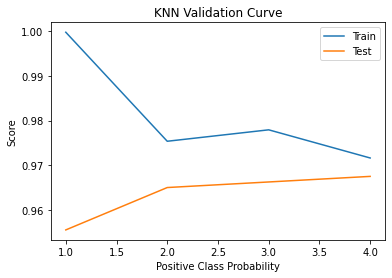

In [141]:
pos_class = [1,2,3,4]
fig1 = plt.figure()
plt.plot(pos_class, train_mean1, label='Train')
plt.plot(pos_class, test_mean1, label='Test')
plt.xlabel('Positive Class Probability')
plt.ylabel('Score')
plt.title('KNN Validation Curve')
plt.legend()
plt.show()
fig1.savefig('knn validation_curve.png')

In [151]:
# Fit d k- nearestneighbours for training data
knn = KNN(2)
knn.fit(Xtrain, ytrain)
# model validation
cross_val_score(knn1, Xtrain, ytrain, cv=5)

array([0.9671875 , 0.9640625 , 0.9640625 , 0.965625  , 0.95774648])

In [152]:
# Accuracy score of test data for KNN - mean test accuracy
knn.score(Xtest, ytest)

0.97125

#### Validation curve - mnb

In [143]:
# Fit decision tree model for all data
mnb1 = MultinomialNB(alpha=1)
mnb1.fit(X, y)

MultinomialNB(alpha=1)

In [144]:
# model validation
cross_val_score(mnb1, X, y, cv=5)

array([0.9625    , 0.96375   , 0.9625    , 0.96375   , 0.96370463])

In [145]:
# Accuracy score
mnb1.score(X, y)

0.964991247811953

In [146]:
# range of priors
prior_set1 = np.arange(1,11)
print(prior_set1)

[ 1  2  3  4  5  6  7  8  9 10]


In [147]:
##checking the tree paramaters
mnb1.get_params()

{'alpha': 1, 'class_prior': None, 'fit_prior': True}

In [148]:
#depth_range = np.arange(1,10)
train_scores2, test_scores2 = validation_curve(mnb1, X, y, param_name='alpha',
                                            param_range=prior_set1, cv=5)
train_scores2

array([[0.96342607, 0.96467646, 0.96467646, 0.96436386, 0.9646875 ],
       [0.96280088, 0.96311347, 0.96280088, 0.96280088, 0.9628125 ],
       [0.96280088, 0.96280088, 0.96280088, 0.96280088, 0.9625    ],
       [0.96280088, 0.96280088, 0.96280088, 0.96280088, 0.9625    ],
       [0.96280088, 0.96280088, 0.96280088, 0.96280088, 0.9625    ],
       [0.96280088, 0.96280088, 0.96280088, 0.96280088, 0.9625    ],
       [0.96280088, 0.96280088, 0.96280088, 0.96280088, 0.9625    ],
       [0.96280088, 0.96280088, 0.96280088, 0.96280088, 0.9625    ],
       [0.96280088, 0.96280088, 0.96280088, 0.96280088, 0.9625    ],
       [0.96280088, 0.96280088, 0.96280088, 0.96280088, 0.9625    ]])

In [149]:
train_mean2 = np.mean(train_scores2, axis=1)
test_mean2 = np.mean(test_scores2, axis=1)
test_mean2

array([0.96324093, 0.96274093, 0.96274093, 0.96274093, 0.96274093,
       0.96274093, 0.96274093, 0.96274093, 0.96274093, 0.96274093])

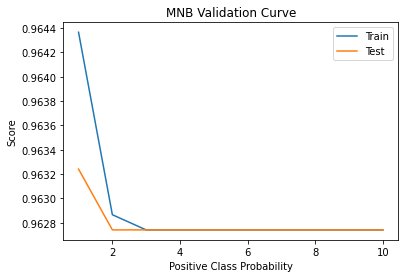

In [150]:
pos_class = [1,2,3,4,5,6,7,8,9,10]
fig1 = plt.figure()
plt.plot(pos_class, train_mean2, label='Train')
plt.plot(pos_class, test_mean2, label='Test')
plt.xlabel('Positive Class Probability')
plt.ylabel('Score')
plt.title('MNB Validation Curve')
plt.legend()
plt.show()
fig1.savefig('validation_curve_mnb.png')

In [137]:
# Fit MultinomialNB for training data
mnb = MultinomialNB(alpha=1)
mnb.fit(Xtrain, ytrain)
cross_val_score(mnb, X, y, cv=5)

array([0.9625    , 0.96375   , 0.9625    , 0.96375   , 0.96370463])

In [138]:
# Accuracy score of test data for MNB - mean test accuracy
mnb.score(Xtest, ytest)

0.96875

#### Validation curve decision tree

In [140]:
# Fit decision tree model for all data
tree = DecisionTreeClassifier()
tree.fit(X, y)

DecisionTreeClassifier()

In [141]:
# model validation
cross_val_score(tree, X, y, cv=5)

array([0.97      , 0.9625    , 0.96      , 0.965     , 0.95869837])

In [142]:
# Accuracy score
tree.score(X, y)

0.9997499374843711

In [143]:
# range of priors
prior_set = np.arange(1,11)
print(prior_set)

[ 1  2  3  4  5  6  7  8  9 10]


In [144]:
##checking the tree paramaters
tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [145]:
#depth_range = np.arange(1,10)
train_scores, test_scores = validation_curve(tree, X, y, param_name='max_depth',
                                            param_range=prior_set, cv=5)
train_scores

array([[0.96967802, 0.96967802, 0.97030322, 0.96936543, 0.9675    ],
       [0.97124101, 0.97655517, 0.97124101, 0.97467959, 0.9734375 ],
       [0.97436699, 0.97905595, 0.97530478, 0.97749297, 0.9775    ],
       [0.97686777, 0.98124414, 0.97686777, 0.97905595, 0.98      ],
       [0.98093154, 0.98155674, 0.98030635, 0.97968115, 0.981875  ],
       [0.98562051, 0.98343232, 0.98343232, 0.98155674, 0.984375  ],
       [0.98843389, 0.9865583 , 0.98562051, 0.98468271, 0.9871875 ],
       [0.98999687, 0.98843389, 0.98780869, 0.98780869, 0.9884375 ],
       [0.99187246, 0.98968428, 0.98905908, 0.98999687, 0.989375  ],
       [0.99281025, 0.99030947, 0.98999687, 0.99062207, 0.9903125 ]])

In [146]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_mean

array([0.96299124, 0.97049312, 0.97299343, 0.97024186, 0.96974186,
       0.96899124, 0.96799124, 0.96649093, 0.96799061, 0.96649124])

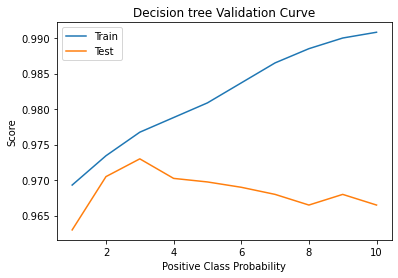

In [147]:
pos_class = [1,2,3,4,5,6,7,8,9,10]
fig1 = plt.figure()
plt.plot(pos_class, train_mean, label='Train')
plt.plot(pos_class, test_mean, label='Test')
plt.xlabel('Positive Class Probability')
plt.ylabel('Score')
plt.title('Decision tree Validation Curve')
plt.legend()
plt.show()
fig1.savefig('validation_curve.png')

In [148]:
# Fit decision tree model for training data
tree1 = DecisionTreeClassifier(max_depth=3)
tree1.fit(Xtrain, ytrain)

DecisionTreeClassifier(max_depth=3)

In [149]:
# model validation
cross_val_score(tree1, Xtrain, ytrain, cv=5)

array([0.9828125 , 0.965625  , 0.965625  , 0.965625  , 0.97026604])

In [150]:
# Accuracy score of test data
tree1.score(Xtest, ytest)

0.9775

#### Confusion matrices

Confusion Matrix KNN : 
 [[768   7]
 [ 17   8]] 



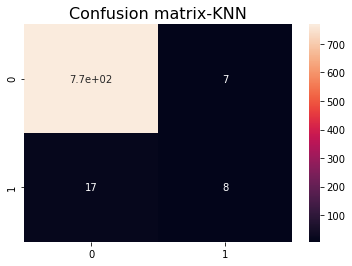

In [151]:
#create array of probabilities
y_test_predict_proba = knn.predict_proba(Xtest)

# calc confusion matrix for test data
y_test_predict = knn.predict(Xtest)
print("Confusion Matrix KNN : \n", confusion_matrix(ytest, y_test_predict),"\n")

cf_knn = confusion_matrix(ytest, y_test_predict)


sns.heatmap(cf_knn, annot=True)
plt.title('Confusion matrix-KNN',fontsize=16)
plt.savefig("Confusion matrix-KNN.png")

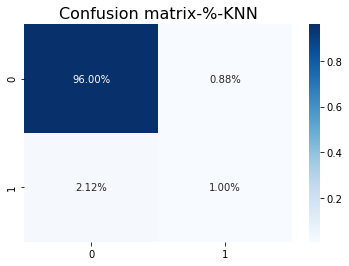

In [152]:
sns.heatmap(cf_knn/np.sum(cf_knn), annot=True, 
            fmt='.2%', cmap='Blues')
plt.title('Confusion matrix-%-KNN',fontsize=16)
plt.savefig("Confusion matrix-%-KNN.png")

Confusion Matrix MNB : 
 [[775   0]
 [ 25   0]] 



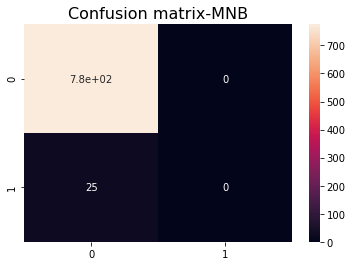

In [153]:
#create array of probabilities
y_test_predict_proba = mnb.predict_proba(Xtest)

# calc confusion matrix for test data
y_test_predict = mnb.predict(Xtest)
print("Confusion Matrix MNB : \n", confusion_matrix(ytest, y_test_predict),"\n")

cf_mnb = confusion_matrix(ytest, y_test_predict)


sns.heatmap(cf_mnb, annot=True)
plt.title('Confusion matrix-MNB',fontsize=16)
plt.savefig("Confusion matrix-MNB.png")

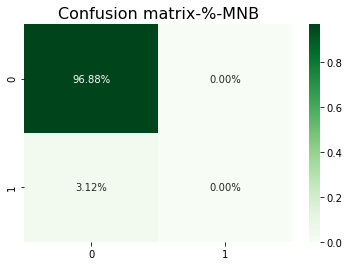

In [154]:
sns.heatmap(cf_mnb/np.sum(cf_mnb), annot=True, 
            fmt='.2%', cmap='Greens')
plt.title('Confusion matrix-%-MNB',fontsize=16)
plt.savefig("Confusion matrix-%-MNB.png")

Confusion Matrix Tree : 
 [[770   5]
 [ 13  12]] 



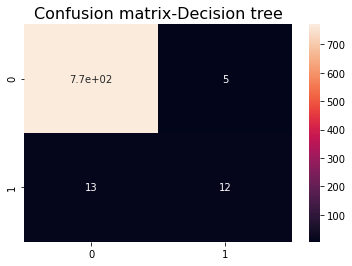

In [155]:


#create array of probabilities
y_test_predict_proba = tree1.predict_proba(Xtest)

# calc confusion matrix for test data
y_test_predict = tree1.predict(Xtest)
print("Confusion Matrix Tree : \n", confusion_matrix(ytest, y_test_predict),"\n")

cf_tree1 = confusion_matrix(ytest, y_test_predict)


sns.heatmap(cf_tree1, annot=True)
plt.title('Confusion matrix-Decision tree',fontsize=16)
plt.savefig("Confusion matrix-Decision tree.png")

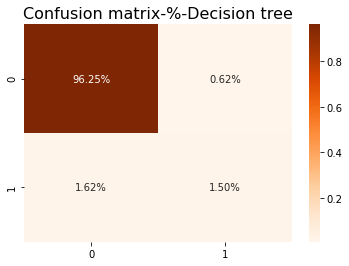

In [156]:
sns.heatmap(cf_tree1/np.sum(cf_tree1), annot=True, 
            fmt='.2%', cmap='Oranges')
plt.title('Confusion matrix-%-Decision tree',fontsize=16)
plt.savefig("Confusion matrix-%-Decision tree.png")


In [157]:
dot_data = export_graphviz(tree1,  
                  filled=True, rounded=True,  
                  special_characters=True,
                   out_file=None,
                           )
graph = graphviz.Source(dot_data)
graph
graph.format = "png"
graph.render("decision tree")

'decision tree.png'

#### ROC curves

In [158]:
# extract information to plot ROC curves for multiple models
def get_curve_data(ytrue, yprobs, pos_class_label):
    '''Computes data needed to plot an ROC or precision-recall curve
       Accepts arrays of true values, predicted probabilities, and class label
       Returns a dictionary of arrays for precision, recall, FPR, and TPR scores'''
    precision, recall, thresholds = precision_recall_curve(ytrue, yprobs, pos_label=pos_class_label)
    FPR, TPR, thresholds = roc_curve(ytrue, yprobs, pos_label=pos_class_label)
    rates = pd.DataFrame(dict(fpr=FPR, tpr=TPR))
    return {'precision': precision, 'recall': recall, 'rates': rates}

In [159]:

##calculating probabilities
probabilities = {'K Nearest Neighbours': knn.fit(Xtrain, ytrain).predict_proba(Xtest),'Multinomial Naive Bayes': mnb.fit(Xtrain, ytrain).predict_proba(Xtest),'Decision tree': tree1.fit(Xtrain, ytrain).predict_proba(Xtest) 
                 }
knn_data = get_curve_data(ytest, probabilities['K Nearest Neighbours'][:,1], 1)
mnb_data = get_curve_data(ytest, probabilities['Multinomial Naive Bayes'][:,1], 1)
tree_data = get_curve_data(ytest, probabilities['Decision tree'][:,1], 1)

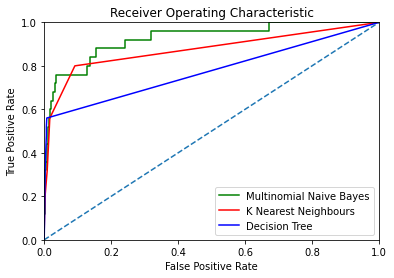

In [160]:
## plotting ROC
fig_roc = plt.figure()

plt.plot(mnb_data['rates'].fpr, mnb_data['rates'].tpr, 'green', label='Multinomial Naive Bayes')
plt.plot(knn_data['rates'].fpr, knn_data['rates'].tpr, 'red', label='K Nearest Neighbours')
plt.plot(tree_data['rates'].fpr, tree_data['rates'].tpr, 'Blue', label='Decision Tree')


plt.plot([0, 1], [0, 1],'--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.savefig("ROC.png")
plt.show()